## 1. import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

## 2. train data 살펴보기

In [2]:
vote_df = pd.read_csv('./train.csv')
vote_df.head(3)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,43375,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,...,1,1,1,1,1,0,1,0,1,1
1,4486,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,...,1,1,1,1,1,0,1,0,1,1
2,10262,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,...,1,1,0,1,1,0,1,0,1,0


아래의 코드로 **null값이 없음**을 알 수 있다.

In [3]:
vote_df.isnull().sum().sum()

0

In [4]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
index         36425 non-null int64
QaA           36425 non-null float64
QaE           36425 non-null int64
QbA           36425 non-null float64
QbE           36425 non-null int64
QcA           36425 non-null float64
QcE           36425 non-null int64
QdA           36425 non-null float64
QdE           36425 non-null int64
QeA           36425 non-null float64
QeE           36425 non-null int64
QfA           36425 non-null float64
QfE           36425 non-null int64
QgA           36425 non-null float64
QgE           36425 non-null int64
QhA           36425 non-null float64
QhE           36425 non-null int64
QiA           36425 non-null float64
QiE           36425 non-null int64
QjA           36425 non-null float64
QjE           36425 non-null int64
QkA           36425 non-null float64
QkE           36425 non-null int64
QlA           36425 non-null float64
QlE           36425 non-nul

In [5]:
def voted_prob(df=None, column=None):
    voted_people = df[df['voted']==1]
    uniques = df[column].unique()
    
    # 투표한 사람들 중 unique의 비율 (e.g. 투표한 사람들 중 남자의 비율)
    for unique in uniques:
        prob = round( len(voted_people[voted_people[column]==unique])/len(voted_people), 4)
        print("투표한 사람들 중", unique, "비율:", prob)
    print("")
    
    # column 속에서 unique마다의 비율 (e.g. gender 컬럼에서 남자의 비율)
    for unique in uniques:
        prob = round(len(df[df[column]==unique])/len(vote_df), 4)
        print(column, "컬럼 중", unique, "의 비율:",prob)
    print("")
    
    # unique 중에서 투표를 한 비율 (e.g.남자 중에서 투표를 한 비율)
    for unique in uniques:
        prob = round( len(voted_people[voted_people[column]==unique])/len(df[df[column]==unique]), 4)
        print(unique, "중 투표를 한 비율: ", prob)

## 2-1. gender컬럼
내가 맡은 column은  gender, married, race, religion이다.

In [6]:
vote_df['gender'].value_counts()

Male      19377
Female    17048
Name: gender, dtype: int64

In [7]:
# 성별이 투표 확률에 영향을 미쳤을까?
vote_df.groupby(['gender', 'voted'])['voted'].count()

gender  voted
Female  0         9159
        1         7889
Male    0        10759
        1         8618
Name: voted, dtype: int64

투표한 사람들 중 Male 비율: 0.5221
투표한 사람들 중 Female 비율: 0.4779

gender 컬럼 중 Male 의 비율: 0.532
gender 컬럼 중 Female 의 비율: 0.468

Male 중 투표를 한 비율:  0.4448
Female 중 투표를 한 비율:  0.4628


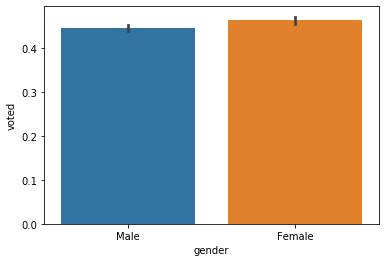

In [8]:
# 남자와 여자의 투표 비율에 큰 차이가 나지 않는다
sns.barplot(x='gender', y='voted', data=vote_df)

voted_prob(df=vote_df, column='gender')

### 결론: 'gender'는 모델 훈련에 넣지 않아도 된다. 인코딩에서 완전 제외.

## 2-2. married 컬럼

In [9]:
vote_df['married'].value_counts()

1    25213
2     8070
3     3068
0       74
Name: married, dtype: int64

In [10]:
# 0의 비율이 너무 적다!
print("0의 비율:", round(len(vote_df[vote_df['married']==0])/len(vote_df), 4))

0의 비율: 0.002


### 0으로 응답한 답변(0인 row들)은 모두 삭제하는 편이 좋겠다.

In [11]:
vote_df.groupby(['married', 'voted'])['voted'].count()

married  voted
0        0           51
         1           23
1        0        15899
         1         9314
2        0         2671
         1         5399
3        0         1297
         1         1771
Name: voted, dtype: int64

In [12]:
# 실험을 위해 mini_vote을 만들 
mini_vote = pd.DataFrame(vote_df['married'])
mini_vote

,married
0,1
1,1
2,1
3,1
4,1
...,...
36420,1
36421,1
36422,2
36423,1


In [13]:
# 이런식으로하면 train의 0이 모두 사라짐
zero_index = mini_vote[mini_vote['married'] == 0].index
mini_vote = mini_vote.drop(zero_index)
mini_vote.shape

(36351, 1)

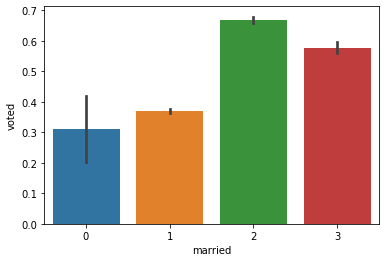

In [14]:
sns.barplot(x='married', y='voted', data=vote_df)

value_counts()로 봤을 때는 1이 가장 많았는데 투표한건 2가 가장 많다...?!  
married는 영항을 준다고 판단함. 이제 이상값제거, 인코딩을 진행해보자.  
생각해보니 married는 0~4사이의 숫자이기 때문에 이상값이 나올 수 없음. 인코딩만 진행!

In [15]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud는 해당하는 column 데이터만 추출
    fraud = df[df['voted']==1][column]
    print(fraud)
    
    quantile_25 = np.percentile(fraud.values, 25)    # Q1
    quantile_75 = np.percentile(fraud.values, 75)    # Q3
    iqr = quantile_75 - quantile_25    # Q1~Q3까지의 부분
    print(quantile_25, quantile_75)
    
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값의 index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [16]:
outlier_index = get_outlier(df=vote_df, column='married')
print("이상치 데이터 인덱스는", outlier_index)

0        1
1        1
2        1
4        1
6        1
        ..
36419    2
36420    1
36422    2
36423    1
36424    3
Name: married, Length: 16507, dtype: int64
1.0 2.0
이상치 데이터 인덱스는 Int64Index([], dtype='int64')


#### 1) 범주형 변수라고 생각할 경우 → 원핫인코딩
결혼에 대해서 true,false라고 생각한다면 카테고리가 하나 더 늘어났을 뿐이니까 범주형이라고 생각 가능.  


In [17]:
mini_vote['married'].value_counts()

1    25213
2     8070
3     3068
Name: married, dtype: int64

In [18]:
pd.get_dummies(mini_vote['married'])

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
36420,1,0,0
36421,1,0,0
36422,0,1,0
36423,1,0,0


#### 2) 순서형 변수라고 생각할 경우 → 레이블 인코딩(이미 되어있음)
교육 수준도 수준에 따라 숫자가 있으니 결혼도 안함, 최근에 함, 예전에 함이라는 순서로 생각할 수 있음.  

## 2-3. race 컬럼

In [19]:
vote_df.groupby(['race', 'voted'])['voted'].count()

race                   voted
Arab                   0          193
                       1           79
Asian                  0         3840
                       1         1626
Black                  0         1019
                       1          689
Indigenous Australian  0           26
                       1           15
Native American        0          255
                       1          179
Other                  0         2158
                       1         1304
White                  0        12427
                       1        12615
Name: voted, dtype: int64

In [20]:
vote_df['race'].value_counts()

White                    25042
Asian                     5466
Other                     3462
Black                     1708
Native American            434
Arab                       272
Indigenous Australian       41
Name: race, dtype: int64

투표한 사람들 중 White 비율: 0.7642
투표한 사람들 중 Asian 비율: 0.0985
투표한 사람들 중 Other 비율: 0.079
투표한 사람들 중 Black 비율: 0.0417
투표한 사람들 중 Native American 비율: 0.0108
투표한 사람들 중 Arab 비율: 0.0048
투표한 사람들 중 Indigenous Australian 비율: 0.0009

race 컬럼 중 White 의 비율: 0.6875
race 컬럼 중 Asian 의 비율: 0.1501
race 컬럼 중 Other 의 비율: 0.095
race 컬럼 중 Black 의 비율: 0.0469
race 컬럼 중 Native American 의 비율: 0.0119
race 컬럼 중 Arab 의 비율: 0.0075
race 컬럼 중 Indigenous Australian 의 비율: 0.0011

White 중 투표를 한 비율:  0.5038
Asian 중 투표를 한 비율:  0.2975
Other 중 투표를 한 비율:  0.3767
Black 중 투표를 한 비율:  0.4034
Native American 중 투표를 한 비율:  0.4124
Arab 중 투표를 한 비율:  0.2904
Indigenous Australian 중 투표를 한 비율:  0.3659


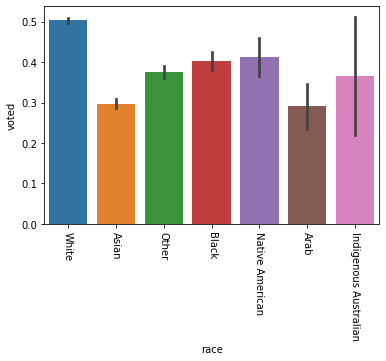

In [21]:
voted_prob(df=vote_df, column='race')

plt.xticks(rotation=-90)
sns.barplot(x='race', y='voted', data=vote_df)

#### 이 컬럼을 모델학습에 넣을지 말지 고민중(일단 만들고 넣은 모델, 안넣은 모델 비교 필요)
1) 왜 넣어야한다고 생각했나요?  
→ 각 인종별 투표의 비율이 0.3~0.5사이로 크게 차이가 있기 때문
  
2) 왜 넣으면 안된다고 생각했나요?  
→ race컬럼 중에 white의 비율이 약 0.7로 압도적으로 많기 때문 → white가 들어오면 그냥 voted로 찍을 수 도 있는 위험성이 존재하게 될수도

### 다시 생각해보니까 빼야겠다! 너무 비율이 치우쳐진 상태라서 필요 없다고 판단하였다. 2주차 제출 전에 한번 넣어보기.

#### 1) 7개의 인종을 모두 원핫인코딩

In [22]:
mini_race = pd.DataFrame(vote_df['race'])
mini_race

,race
0,White
1,Asian
2,White
3,Other
4,White
...,...
36420,Black
36421,White
36422,White
36423,White


In [23]:
pd.get_dummies(mini_race['race'])

,Arab,Asian,Black,Indigenous Australian,Native American,Other,White
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
36420,0,0,1,0,0,0,0
36421,0,0,0,0,0,0,1
36422,0,0,0,0,0,0,1
36423,0,0,0,0,0,0,1


#### 2) 몇개의 인종은 하나로(?) 묶은 다음 인코딩

2-1) white or not_white

In [24]:
def is_white(df):
    is_white_list=[]
    for i in range(len(df)):
        if df.iloc[i]['race']=='White':
            is_white_list.append(1)
        else:
            is_white_list.append(0)
    return is_white_list
            
is_white_list = is_white(mini_race)

mini_race['isWhite'] = is_white_list
mini_race

,race,isWhite
0,White,1
1,Asian,0
2,White,1
3,Other,0
4,White,1
...,...,...
36420,Black,0
36421,White,1
36422,White,1
36423,White,1


2-2) 같은 인종 중 한자리수 반올림하여 투표비율이 0.3, 0.4, 0.5로 나누어 **라벨인코딩**  
White 중 투표를 한 비율:  0.5038  
Asian 중 투표를 한 비율:  0.2975  
Other 중 투표를 한 비율:  0.3767  
Black 중 투표를 한 비율:  0.4034  
Native American 중 투표를 한 비율:  0.4124  
Arab 중 투표를 한 비율:  0.2904  
Indigenous Australian 중 투표를 한 비율:  0.3659  
> White는 0.5 → 2로 라벨링  
> Other, Black, Native American, Indigenous Australian 는 0.4 → 1로 라벨링  
> Asian, Arab는 0.3 → 0로 라벨링

In [25]:
def race_labeling(df):
    label_list=[]
    for i in range(len(df)):
        if df.iloc[i]['race']=='White':
            label_list.append(2)
        elif df.iloc[i]['race']=='Asian' or df.iloc[i]['race']=='Arab':
            label_list.append(0)
        else:
            label_list.append(1)
    return label_list

label_list = race_labeling(mini_race)

mini_race['race_labeling'] = label_list
mini_race

,race,isWhite,race_labeling
0,White,1,2
1,Asian,0,0
2,White,1,2
3,Other,0,1
4,White,1,2
...,...,...,...
36420,Black,0,1
36421,White,1,2
36422,White,1,2
36423,White,1,2


In [26]:
mini_race['race_labeling'].unique()

array([2, 0, 1], dtype=int64)

## 2-4. religion컬럼

In [27]:
vote_df['religion'].value_counts()

Atheist                 8139
Agnostic                7736
Christian_Catholic      5131
Christian_Other         4072
Christian_Protestant    3908
Other                   3857
Hindu                   1151
Muslim                   928
Buddhist                 674
Jewish                   402
Christian_Mormon         332
Sikh                      95
Name: religion, dtype: int64

In [28]:
vote_df.groupby(['religion', 'voted'])['voted'].count()

religion              voted
Agnostic              0        4201
                      1        3535
Atheist               0        4651
                      1        3488
Buddhist              0         413
                      1         261
Christian_Catholic    0        2697
                      1        2434
Christian_Mormon      0         196
                      1         136
Christian_Other       0        2206
                      1        1866
Christian_Protestant  0        1707
                      1        2201
Hindu                 0         702
                      1         449
Jewish                0         188
                      1         214
Muslim                0         634
                      1         294
Other                 0        2261
                      1        1596
Sikh                  0          62
                      1          33
Name: voted, dtype: int64

In [29]:
voted_prob(df=vote_df, column='religion')

투표한 사람들 중 Christian_Catholic 비율: 0.1475
투표한 사람들 중 Hindu 비율: 0.0272
투표한 사람들 중 Christian_Other 비율: 0.113
투표한 사람들 중 Other 비율: 0.0967
투표한 사람들 중 Atheist 비율: 0.2113
투표한 사람들 중 Christian_Protestant 비율: 0.1333
투표한 사람들 중 Jewish 비율: 0.013
투표한 사람들 중 Agnostic 비율: 0.2142
투표한 사람들 중 Christian_Mormon 비율: 0.0082
투표한 사람들 중 Buddhist 비율: 0.0158
투표한 사람들 중 Muslim 비율: 0.0178
투표한 사람들 중 Sikh 비율: 0.002

religion 컬럼 중 Christian_Catholic 의 비율: 0.1409
religion 컬럼 중 Hindu 의 비율: 0.0316
religion 컬럼 중 Christian_Other 의 비율: 0.1118
religion 컬럼 중 Other 의 비율: 0.1059
religion 컬럼 중 Atheist 의 비율: 0.2234
religion 컬럼 중 Christian_Protestant 의 비율: 0.1073
religion 컬럼 중 Jewish 의 비율: 0.011
religion 컬럼 중 Agnostic 의 비율: 0.2124
religion 컬럼 중 Christian_Mormon 의 비율: 0.0091
religion 컬럼 중 Buddhist 의 비율: 0.0185
religion 컬럼 중 Muslim 의 비율: 0.0255
religion 컬럼 중 Sikh 의 비율: 0.0026

Christian_Catholic 중 투표를 한 비율:  0.4744
Hindu 중 투표를 한 비율:  0.3901
Christian_Other 중 투표를 한 비율:  0.4583
Other 중 투표를 한 비율:  0.4138
Atheist 중 투표를 한 비율:  0.4286
Christian_P

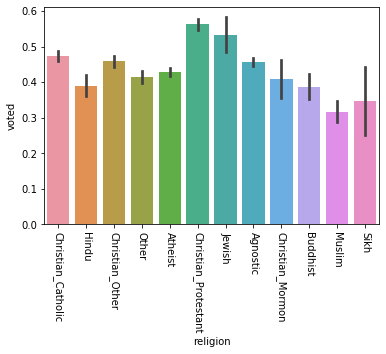

In [30]:
plt.xticks(rotation=-90)
sns.barplot(x='religion', y='voted', data=vote_df)

### 결론: 넣어야 될 것 같다. 원핫인코딩밖에 생각이 안난다.

In [31]:
religion_df = pd.DataFrame(vote_df['religion'])
pd.get_dummies(religion_df['religion'])

,Agnostic,Atheist,Buddhist,Christian_Catholic,Christian_Mormon,Christian_Other,Christian_Protestant,Hindu,Jewish,Muslim,Other,Sikh
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36420,0,0,0,0,0,0,0,0,0,0,1,0
36421,0,0,0,0,0,0,0,0,1,0,0,0
36422,1,0,0,0,0,0,0,0,0,0,0,0
36423,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
len(vote_df.columns)
vote_df.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [ ]:
def drop_coulmn(df=None):
    cols = ['gender',dddd]
    df.drop()